In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr
from scipy.stats import norm

npr.seed(20)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [3]:
N=100
std=1

#generate data
gaus = npr.normal(0,std,(N,))

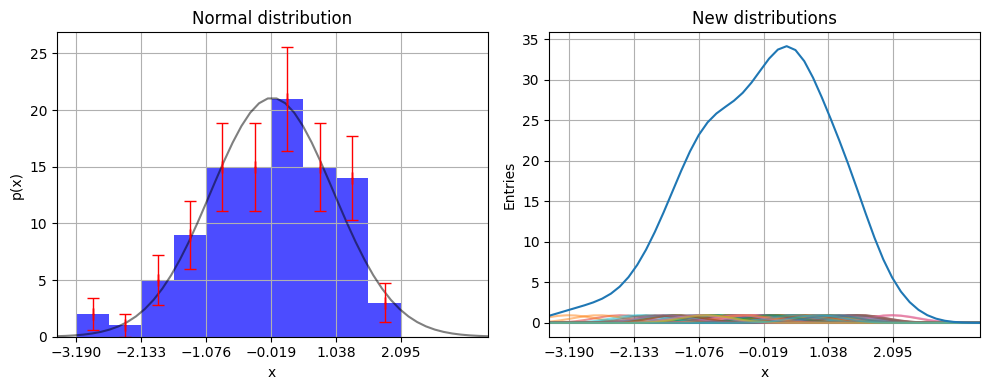

In [24]:
#create the subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(10, 4))

#plot hist
values, bin, _ = ax1.hist(gaus, bins=10, alpha=0.7, color='blue')
area = sum(np.diff(bin)*values)
lim = max(-min(gaus), max(gaus))*1.1
width = (max(values)+min(values))/10

ax1.set_xlim(-lim, lim)

#superimpose the distribution
lim = max(-min(gaus), max(gaus))*1.1
x_pdf = np.linspace(-lim,lim)
y_pdf = area * norm.pdf(x=x_pdf, loc=0, scale=1)

ax1.plot(x_pdf, y_pdf, color='black', alpha=0.5)

#compute the centers of bin and the std
bincenters = (bin[1:]+bin[:-1])*0.5
std = np.sqrt(values)
ax1.errorbar(bincenters, values, yerr=std, xerr=0, fmt='.', ecolor='r', mec='r', ms=1, barsabove=True, capsize=4, elinewidth=1, markeredgewidth=1)

#for each bin compute the new gaussian 
new_std = 1.06 * 1 * N**(-1/5)
new_gaus = [norm.pdf(x=x_pdf, loc=c, scale=new_std) for c in gaus]

#plot 
for g in new_gaus:
    ax2.plot(x_pdf, g, alpha=0.5)
sum_gaus = np.sum(new_gaus, axis=0)
ax2.plot(x_pdf, sum_gaus)

#display thicks ax1
ax1.set_xticks(bin[::2])

ax1.set_title('Normal distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')

#display thicks ax2
ax2.set_xticks(bin[::2])

ax2.set_title('New distributions')
ax2.set_xlabel('x')
ax2.set_ylabel('Entries')

ax1.grid()
ax2.grid()
plt.tight_layout()

In [18]:
#integration
#hist_integral = np.trapz(y=n,dx=binwidth)

(10, 50)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-01-18 11:06:02--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2024-01-18 11:06:03--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b43f524d4522b379ce319210f.dl.dropboxusercontent.com/cd/0/inline/CLmBjJiatOf8aCZTjmOyPJ33XwSQS4SCtsTeQzMh7_VhuQTsmNpdks7PDiOGeCd_XWn1gdb-qZqfGFfFsZlmaZ6Z2uZr-OLsy1eyBkLUbE4N64_z4wQGoavH-za_isGvAxo/file# [following]
--2024-01-18 11:06:03--  https://uc8b43f524d4522b379ce319210f.dl.dropboxusercontent.com/cd/0/inline/CLmBjJiatOf8aCZTjmOyPJ33XwSQS4SCtsTeQzMh7_VhuQTsmNpdks7PDiOGeCd

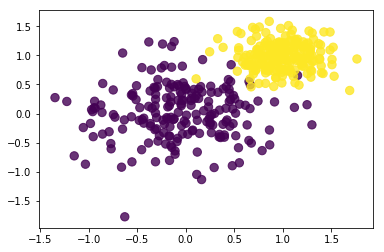

In [5]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot